In [167]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
data = pd.read_csv('./Indicators.csv', sep = ',', error_bad_lines=False)
data.shape

(5656458, 6)

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [5]:
data.head(100)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [6]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [7]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

In [8]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [9]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

In [10]:
print(min(data['Year'])," to ",max(data['Year']))

1960  to  2015


In [11]:
# select CO2 emissions for the United States
hist_indicator = 'Arms exports'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]

In [12]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22225,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,5.961000e+09
48699,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1961,6.376000e+09
77077,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1962,5.725000e+09
105694,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1963,9.029000e+09
134732,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1964,1.207700e+10


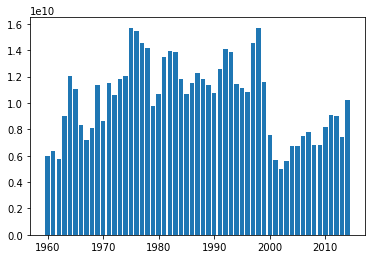

In [14]:
# get the years
years = stage['Year'].values
# get the values 
Arms_exports = stage['Value'].values
# create
plt.bar(years,Arms_exports)
plt.show()

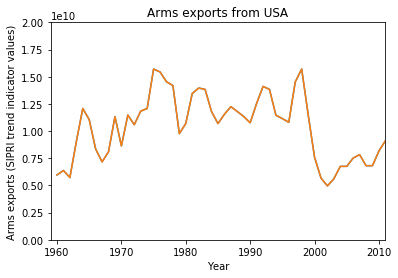

In [32]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('Arms exports from USA')
plt.grid()
# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,20000000000])
plt.show()

In [33]:
# If you want to just include those within one standard deviation fo the mean, you could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [34]:
print(len(hist_data))

55


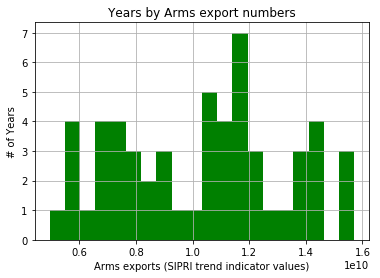

In [88]:
# the histogram of the data
plt.hist(hist_data, 20, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Years by Arms export numbers')
plt.grid(True)

plt.show()

In [110]:
# select arms exports for all countries or regions of interest
hist_indicator = 'Arms exports'

y10_year = [2010]
y11_year = [2011]
y12_year = [2012]
y13_year = [2013]
y09_year = [2009]

list_countries =['EAP','NAC','EUU', 'HIC']

mask1 = data['IndicatorName'].str.contains(hist_indicator) 

# mask2
mask10 = data['Year'].isin([y10_year])
mask11 = data['Year'].isin([y11_year])
mask12 = data['Year'].isin([y12_year])
mask13 = data['Year'].isin([y13_year])
mask09 = data['Year'].isin([y09_year])

mask3 = data['CountryCode'].isin(list_countries)

# apply mask
Arms_2010 = data[mask1 & mask10 & mask3]
Arms_2011 = data[mask1 & mask11 & mask3]
Arms_2012 = data[mask1 & mask12 & mask3]
Arms_2013 = data[mask1 & mask13 & mask3]
Arms_2009 = data[mask1 & mask09 & mask3]

In [111]:
Arms_2009.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4662705,East Asia & Pacific (developing only),EAP,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2009,1.158000e+09
4665621,European Union,EUU,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2009,8.422000e+09
4667279,High income,HIC,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2009,2.207800e+10
4675810,North America,NAC,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2009,7.002000e+09


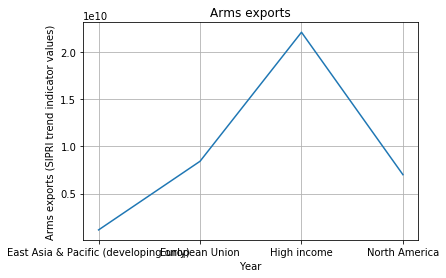

In [128]:
plt.plot(Arms_2009['CountryName'], Arms_2009['Value'])
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('Arms exports')
plt.grid()
# to make more honest, start they y axis at 0
# plt.axis([1959, 2011,0,20000000000])
plt.show()

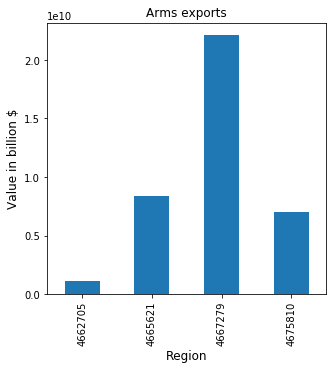

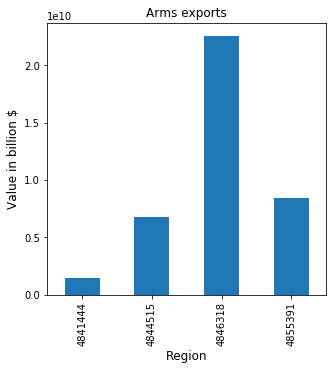

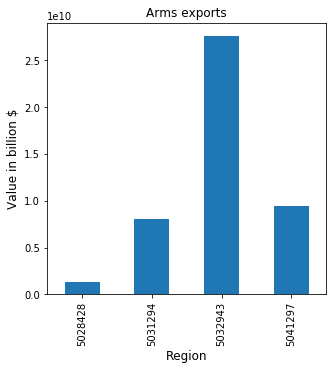

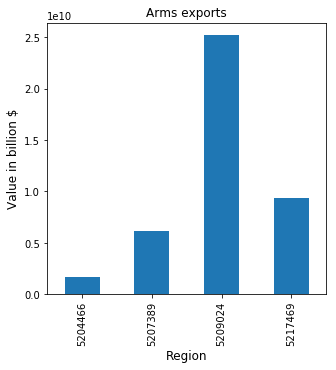

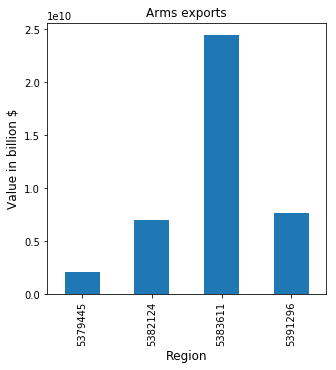

In [166]:
# plt.figure(kind='bar',alpha=0.75, rot=0)
# plt.xlabel(alpha=0.75,rot=90)
# plt.xlim(0,18000)
# plt.ylim(0,30)


# for frame in [Arms_2009,Arms_2010, Arms_2011, Arms_2012, Arms_2013]:
#     plt.plot(frame['CountryName'], frame['Value'])
    
for frame in [Arms_2009,Arms_2010, Arms_2011, Arms_2012, Arms_2013]:
    ax = frame[['CountryCode','Value']].plot(kind='bar', title ="Arms exports", figsize=(5, 5), legend=False) 
    ax.set_xlabel("Region", fontsize=12)
    ax.set_ylabel("Value in billion $", fontsize=12)
    plt.xticks( rotation=90)
# plt.xlabel('Region')
# plt.ylabel(stage['IndicatorName'].iloc[0])
# plt.xticks( rotation=90)

# #label the figure
# plt.title('Arms exports from various regions')
# plt.grid()  
plt.show()

TypeError: iteration over a 0-d array

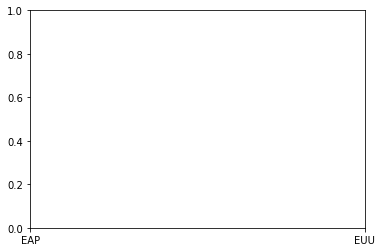

In [122]:
# plt.hist(Arms_2009['CountryCode'], Arms_2009['Value'] )
# plt.show()

plt.hist(Arms_2009['CountryCode'], Arms_2009['Value'], 4, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0], rotation=90)
plt.ylabel('Value')
plt.title('Years by Arms export numbers')
plt.grid(True)

plt.show()



In [93]:
# let's plot a histogram by country
# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(10000000000, 3), xycoords='data',
            xytext=(15000000000, 15), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(Arms_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Arms exports by country')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

ValueError: Image size of 2115098147x284 pixels is too large. It must be less than 2^16 in each direction.

### Relationship between GDP and CO2 Emissions in USA

In [74]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [75]:
gdp_stage.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


In [79]:
stage.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22225,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,5.961000e+09
48699,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1961,6.376000e+09
77077,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1962,5.725000e+09
105694,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1963,9.029000e+09
134732,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1964,1.207700e+10


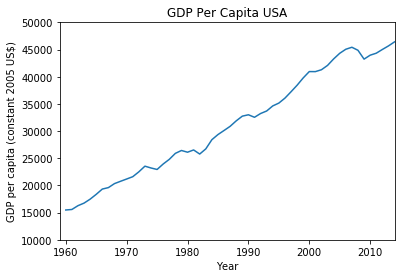

In [80]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
plt.axis([1959, 2014,10000,50000])

plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [81]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2014


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [83]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2015]
print(len(gdp_stage_trunc))
print(len(stage))

55
55


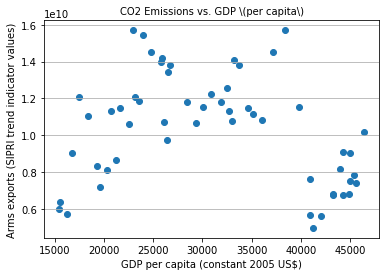

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship.  We can test this by looking at correlation.

In [85]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[ 1.        , -0.24478061],
       [-0.24478061,  1.        ]])

A correlation of 0.07 is pretty weak, but you'll learn more about correlation in the next course.

You could continue to explore this to see if other countries have a closer relationship between CO2 emissions and GDP.  Perhaps it is stronger for developing countries?

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;